In [1]:
# Supress the Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Using Pandas to read the dataset into leads

leads = pd.read_csv("Leads.csv")

In [4]:
# Checking the head of the dataset

leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# Checking the shape of the dataframe leads 

leads.shape

(9240, 37)

In [6]:
# Initial Examination of the dataframe leads 

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [7]:
# Checking mathematical values of the dataframe leads

leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
# Finding the percent of null values present in each column

round(100*(leads.isnull().sum()/len(leads.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [9]:
# Dropping columns not used in further analysis and cleaning the dataset
# We are dropping all the columns which have more than 40% missing values

leads = leads.drop('Lead Quality',axis=1)
leads = leads.drop('Prospect ID',axis=1)
leads = leads.drop('Asymmetrique Activity Index',axis=1)
leads = leads.drop('Asymmetrique Profile Index',axis=1)
leads = leads.drop('Asymmetrique Activity Score',axis=1)
leads = leads.drop('Asymmetrique Profile Score',axis=1)

# Below columns have a single value "No", so it won't be helpful in our analysis. Hence, we are dropping them.

leads = leads.drop('Magazine',axis=1)
leads = leads.drop('Receive More Updates About Our Courses',axis=1)
leads = leads.drop('Update me on Supply Chain Content',axis=1)
leads = leads.drop('Get updates on DM Content',axis=1)
leads = leads.drop('I agree to pay the amount through cheque',axis=1)

In [10]:
# Finding the percent of null values present in each column

round(100*(leads.isnull().sum()/len(leads.index)),2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [11]:
# Columns having value as Select indicate that there is no input value
# Replacing Select by NaN for the below columns

leads['Specialization'] = leads['Specialization'].replace('Select', np.nan)
leads['How did you hear about X Education'] = leads['How did you hear about X Education'].replace('Select', np.nan)
leads['Lead Profile'] = leads['Lead Profile'].replace('Select', np.nan)
leads['City'] = leads['City'].replace('Select', np.nan)

In [12]:
# Finding the percent of null values present in each column after Select is replaced by NaN

round(100*(leads.isnull().sum()/len(leads.index)),2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [13]:
# Dropping columns which have higher percentage of Null values

leads = leads.drop('How did you hear about X Education',axis=1)
leads = leads.drop('Lead Profile',axis=1)
leads = leads.drop('City',axis=1)

In [14]:
# Finding the percent of null values present in each column

round(100*(leads.isnull().sum()/len(leads.index)),2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [15]:
leads['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
unknown                    5
Germany                    4
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Sweden                     3
Asia/Pacific Region        2
Uganda                     2
Belgium                    2
Bangladesh                 2
Philippines                2
Italy                      2
Ghana                      2
Netherlands                2
China                      2
Denmark                    1
Sri Lanka                  1
Switzerland                1
Vietnam                    1
Russia                     1
Malaysia                   1
Indonesia     

In [16]:
leads['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Media and Advertising                203
Travel and Tourism                   203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [17]:
leads['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [18]:
leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [19]:
leads['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [20]:
# Initial Examination of the dataframe leads 

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 23 columns):
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   5860 non-null object
What is your current occupation                  6550 

In [21]:
leads = leads.drop('Country',axis=1)
leads = leads.drop('What is your current occupation',axis=1)
leads = leads.drop('What matters most to you in choosing a course',axis=1)
leads = leads.drop('Tags',axis=1)
leads = leads.drop('Specialization',axis=1)

In [22]:
# Finding the percent of null values present in each column

round(100*(leads.isnull().sum()/len(leads.index)),2)

Lead Number                               0.00
Lead Origin                               0.00
Lead Source                               0.39
Do Not Email                              0.00
Do Not Call                               0.00
Converted                                 0.00
TotalVisits                               1.48
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Last Activity                             1.11
Search                                    0.00
Newspaper Article                         0.00
X Education Forums                        0.00
Newspaper                                 0.00
Digital Advertisement                     0.00
Through Recommendations                   0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

In [23]:
# Initial Examination of the dataframe leads 

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 18 columns):
Lead Number                               9240 non-null int64
Lead Origin                               9240 non-null object
Lead Source                               9204 non-null object
Do Not Email                              9240 non-null object
Do Not Call                               9240 non-null object
Converted                                 9240 non-null int64
TotalVisits                               9103 non-null float64
Total Time Spent on Website               9240 non-null int64
Page Views Per Visit                      9103 non-null float64
Last Activity                             9137 non-null object
Search                                    9240 non-null object
Newspaper Article                         9240 non-null object
X Education Forums                        9240 non-null object
Newspaper                                 9240 non-null object
Digital Adve

## Data visualization

In [24]:
leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,No,No,No,No,No,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,No,No,No,No,No,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,No,No,No,No,No,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,No,No,No,No,No,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,No,No,No,No,No,No,No,Modified


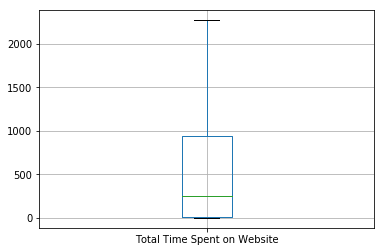

In [25]:
boxplot = leads.boxplot(column=['Total Time Spent on Website'])

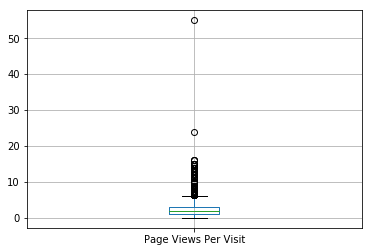

In [26]:
boxplot = leads.boxplot(column=[ 'Page Views Per Visit'])

### the outliers will have to be removed

Lead Sources and lead convertion  
Converted 0:NO
Converted 1:Yes


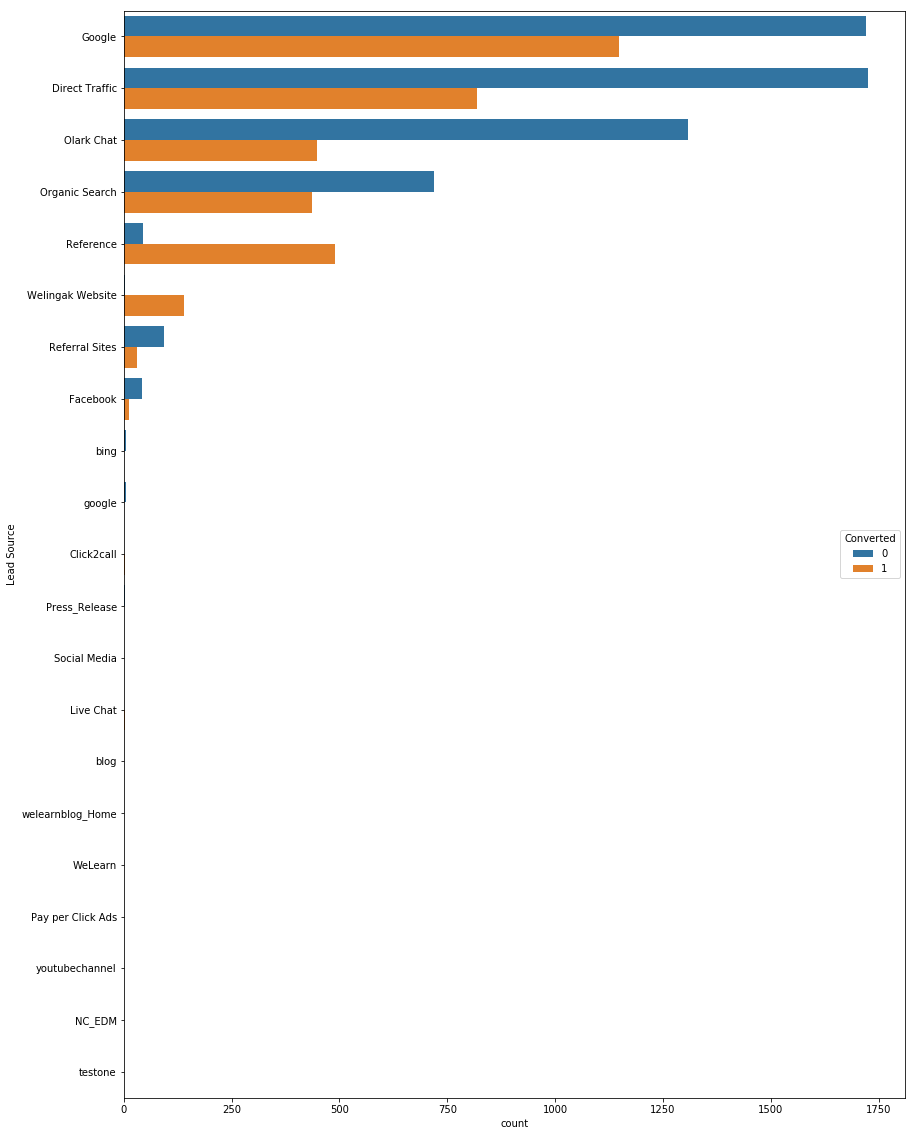

In [27]:
# Under standing the lead source and Convertion
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(14, 20)
sns.countplot(y="Lead Source",data=leads,order = leads['Lead Source'].value_counts().index,hue="Converted")
print("Lead Sources and lead convertion  ")
print("Converted 0:NO")
print("Converted 1:Yes")

### Lead Sources 
    1 Reference
    2 Welingak Website 
    
    Result in higher converton rates

Lead Origin and lead convertion 
Converted 0:NO
Converted 1:Yes


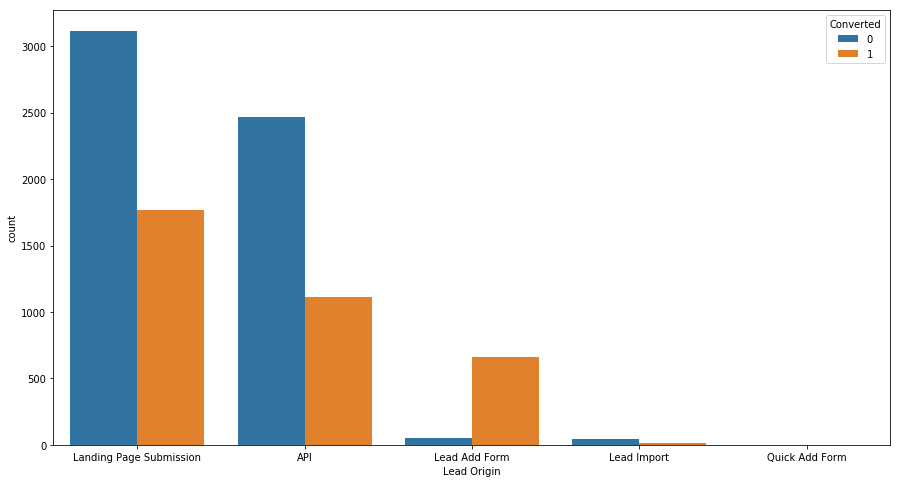

In [28]:
# Under standing the Lead Origin and lead convertion 
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(15, 8)
sns.countplot(x="Lead Origin",data=leads,order = leads['Lead Origin'].value_counts().index,hue="Converted")
print("Lead Origin and lead convertion ")
print("Converted 0:NO")
print("Converted 1:Yes")

### Lead Origin 
    1 Lead Add Form
    
    Result in higher converton rates

Last Activity and lead convertion 
Converted 0:NO
Converted 1:Yes


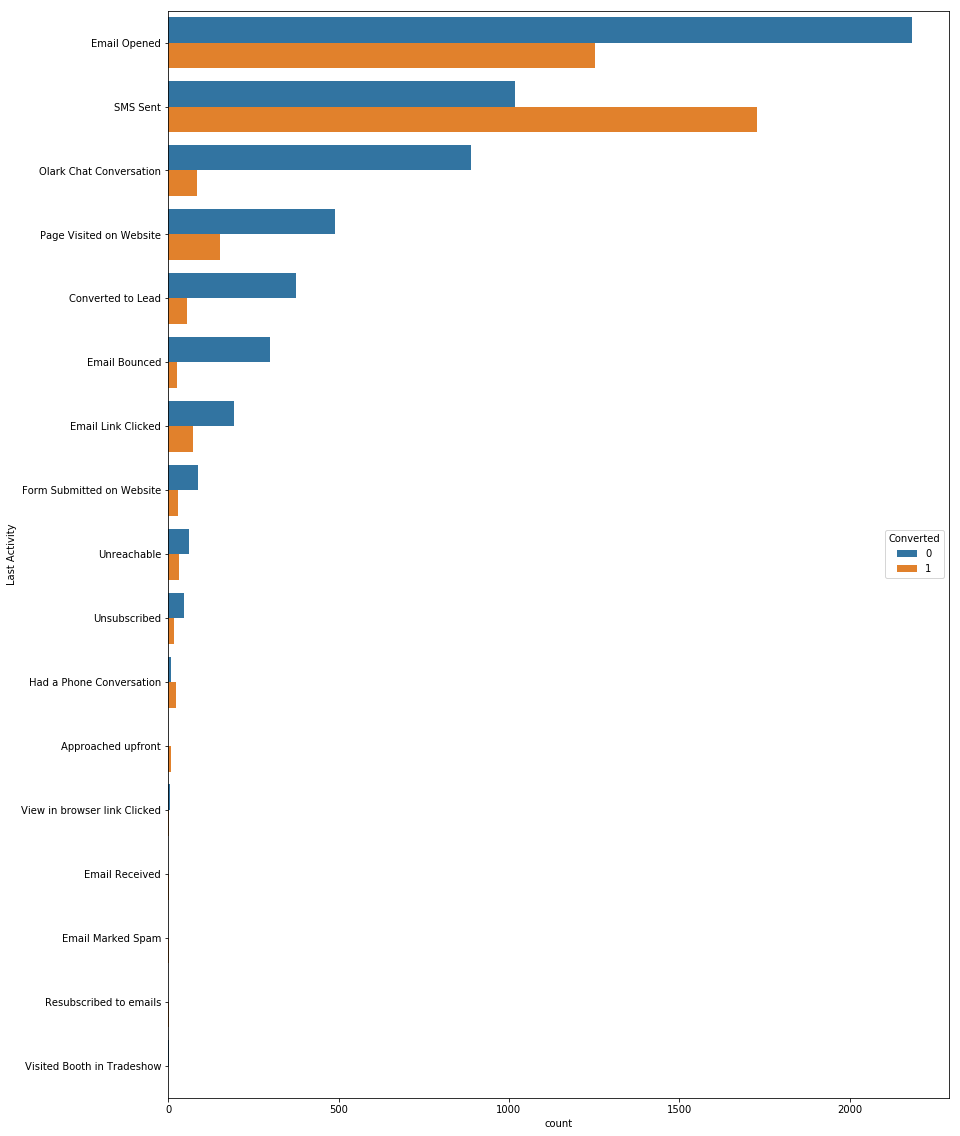

In [29]:
# Under standing Last Activity and lead convertion 
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(14, 20)
sns.countplot(y="Last Activity",data=leads,order = leads['Last Activity'].value_counts().index,hue="Converted")
print("Last Activity and lead convertion ")
print("Converted 0:NO")
print("Converted 1:Yes")

### Last Activity 
    1 Sms Sent
    2 Had a Phone Conversation
    
    Result in higher converton rates

In [30]:
df_mean=leads.groupby(['Converted']).mean()
df_mean=df_mean.reset_index()
df_mean.head()

,Converted,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,0,616722.197570,3.329670,330.404473,2.368453
1,1,617931.981185,3.633632,738.546757,2.353638


Mean Total Time Spent on Website
Converted 0:NO
Converted 1:Yes


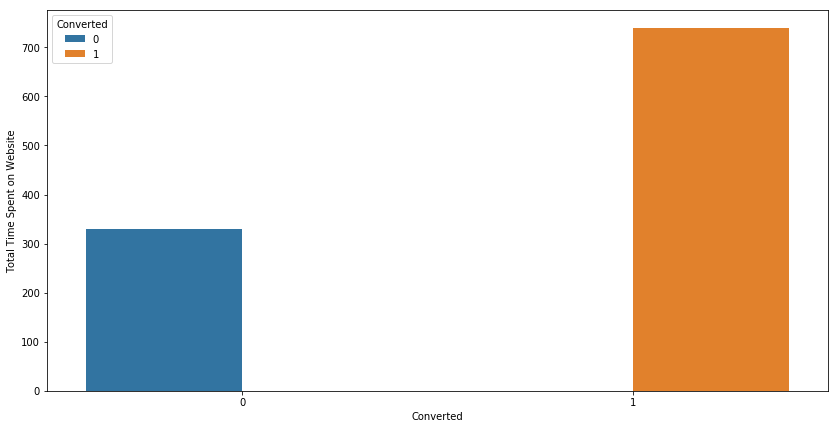

In [31]:
#mean values distribution
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(14, 7)
sns.barplot(y="Total Time Spent on Website",x="Converted",data=df_mean,hue="Converted")
print("Mean Total Time Spent on Website")
print("Converted 0:NO")
print("Converted 1:Yes")

### Time Spend on the website has a corellation with conversion rate.

In [32]:
leads.to_csv('leads_tableau.csv')

## Data Preparation

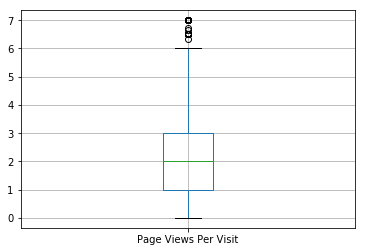

In [33]:
# removing outliers
leads = leads[leads[ 'Page Views Per Visit']-leads[ 'Page Views Per Visit'].mean() <= (2.25*leads[ 'Page Views Per Visit'].std())]
# keep only the ones that are less than 2.25  standard deviations in the column
boxplot = leads.boxplot(column=[ 'Page Views Per Visit'])

In [34]:
# List of variables to map
# Mapping all Yes by 1 and No by 0 for the below columns

varlist =  ['Do Not Email', 'Do Not Call','Search', 'Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[varlist] = leads[varlist].apply(binary_map)

In [35]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.

dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Last Activity', 'Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe

leads = pd.concat([leads, dummy], axis=1)

In [36]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8892 entries, 0 to 9239
Data columns (total 72 columns):
Lead Number                                           8892 non-null int64
Lead Origin                                           8892 non-null object
Lead Source                                           8863 non-null object
Do Not Email                                          8892 non-null int64
Do Not Call                                           8892 non-null int64
Converted                                             8892 non-null int64
TotalVisits                                           8892 non-null float64
Total Time Spent on Website                           8892 non-null int64
Page Views Per Visit                                  8892 non-null float64
Last Activity                                         8892 non-null object
Search                                                8892 non-null int64
Newspaper Article                                     8892 non-null int6

In [37]:
# We have created dummies for the below variables, so we can drop them

leads = leads.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Last Notable Activity'], 1)

In [38]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8892 entries, 0 to 9239
Data columns (total 68 columns):
Lead Number                                           8892 non-null int64
Do Not Email                                          8892 non-null int64
Do Not Call                                           8892 non-null int64
Converted                                             8892 non-null int64
TotalVisits                                           8892 non-null float64
Total Time Spent on Website                           8892 non-null int64
Page Views Per Visit                                  8892 non-null float64
Search                                                8892 non-null int64
Newspaper Article                                     8892 non-null int64
X Education Forums                                    8892 non-null int64
Newspaper                                             8892 non-null int64
Digital Advertisement                                 8892 non-null int64
T

In [39]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%

leads.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,8892.000000,8892.000000,8892.000000,8892.000000,8892.000000,8892.000000,8892.000000,8892.000000,8892.000000,8892.000000,...,8892.000000,8892.000000,8892.000000,8892.000000,8892.000000,8892.000000,8892.000000,8892.000000,8892.000000,8892.000000
mean,617023.796221,0.078273,0.000225,0.380004,3.258435,477.081084,2.186053,0.001350,0.000112,0.000112,...,0.000112,0.001574,0.359874,0.020468,0.034863,0.000112,0.237854,0.003374,0.005173,0.000112
std,23293.084204,0.268615,0.014997,0.485415,4.515910,544.409122,1.756776,0.036713,0.010605,0.010605,...,0.010605,0.039650,0.479990,0.141602,0.183443,0.010605,0.425793,0.057990,0.071743,0.010605
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,596416.750000,0.000000,0.000000,0.000000,1.000000,3.750000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,615405.500000,0.000000,0.000000,0.000000,3.000000,239.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,637105.500000,0.000000,0.000000,1.000000,4.000000,909.250000,3.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
90%,650087.900000,0.000000,0.000000,1.000000,7.000000,1371.000000,5.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
95%,655232.850000,1.000000,0.000000,1.000000,9.000000,1553.450000,5.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
99%,659524.980000,1.000000,0.000000,1.000000,16.000000,1837.180000,7.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000


In [40]:
leads.shape

(8892, 68)

In [41]:
print(leads['TotalVisits'].median())
print(leads['Page Views Per Visit'].median())

3.0
2.0


In [42]:
round(100*(leads.isnull().sum()/len(leads.index)),2)

Lead Number                                           0.0
Do Not Email                                          0.0
Do Not Call                                           0.0
Converted                                             0.0
TotalVisits                                           0.0
Total Time Spent on Website                           0.0
Page Views Per Visit                                  0.0
Search                                                0.0
Newspaper Article                                     0.0
X Education Forums                                    0.0
Newspaper                                             0.0
Digital Advertisement                                 0.0
Through Recommendations                               0.0
A free copy of Mastering The Interview                0.0
Lead Origin_Landing Page Submission                   0.0
Lead Origin_Lead Add Form                             0.0
Lead Origin_Lead Import                               0.0
Lead Source_Di

In [43]:
# Replacing the Null values in the columns: by the median so that we can scale the data for model building

#leads['TotalVisits'] = leads['TotalVisits'].replace(np.nan, 3)
#leads['Page Views Per Visit'] = leads['Page Views Per Visit'].replace(np.nan, 2)


leads['TotalVisits'].fillna((leads['TotalVisits'].mean()), inplace=True)
leads['Page Views Per Visit'].fillna((leads['Page Views Per Visit'].mean()), inplace=True)
leads['TotalVisits'] = leads['TotalVisits'].round()
leads['Page Views Per Visit'] = leads['Page Views Per Visit'].round()                             

In [44]:
leads.to_csv('leads_1.csv')

### Test-Train Split

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
# Putting feature variable to X
X = leads.drop(['Converted'], axis=1)

X.head()

,Lead Number,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0,0,0.0,0,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,660728,0,0,5.0,674,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,660727,0,0,2.0,1532,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,660719,0,0,1.0,305,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,660681,0,0,2.0,1428,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [47]:
# Putting response variable to y
y = leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [48]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
scaler = StandardScaler()

X_train[['Lead Number','TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['Lead Number','TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Lead Number,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
8735,-1.462827,0,0,-0.489602,0.020362,-0.684644,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4460,-0.007851,0,0,-0.708831,-0.879778,-1.256314,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
629,1.594976,0,0,0.168085,-0.277844,1.030365,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1529,1.169815,0,0,0.168085,1.581339,1.030365,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3382,0.463155,0,0,-0.708831,-0.879778,-1.256314,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [51]:
### Checking the Converted Rate

Converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Converted

38.000449842555106

### Looking at Correlations

In [52]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

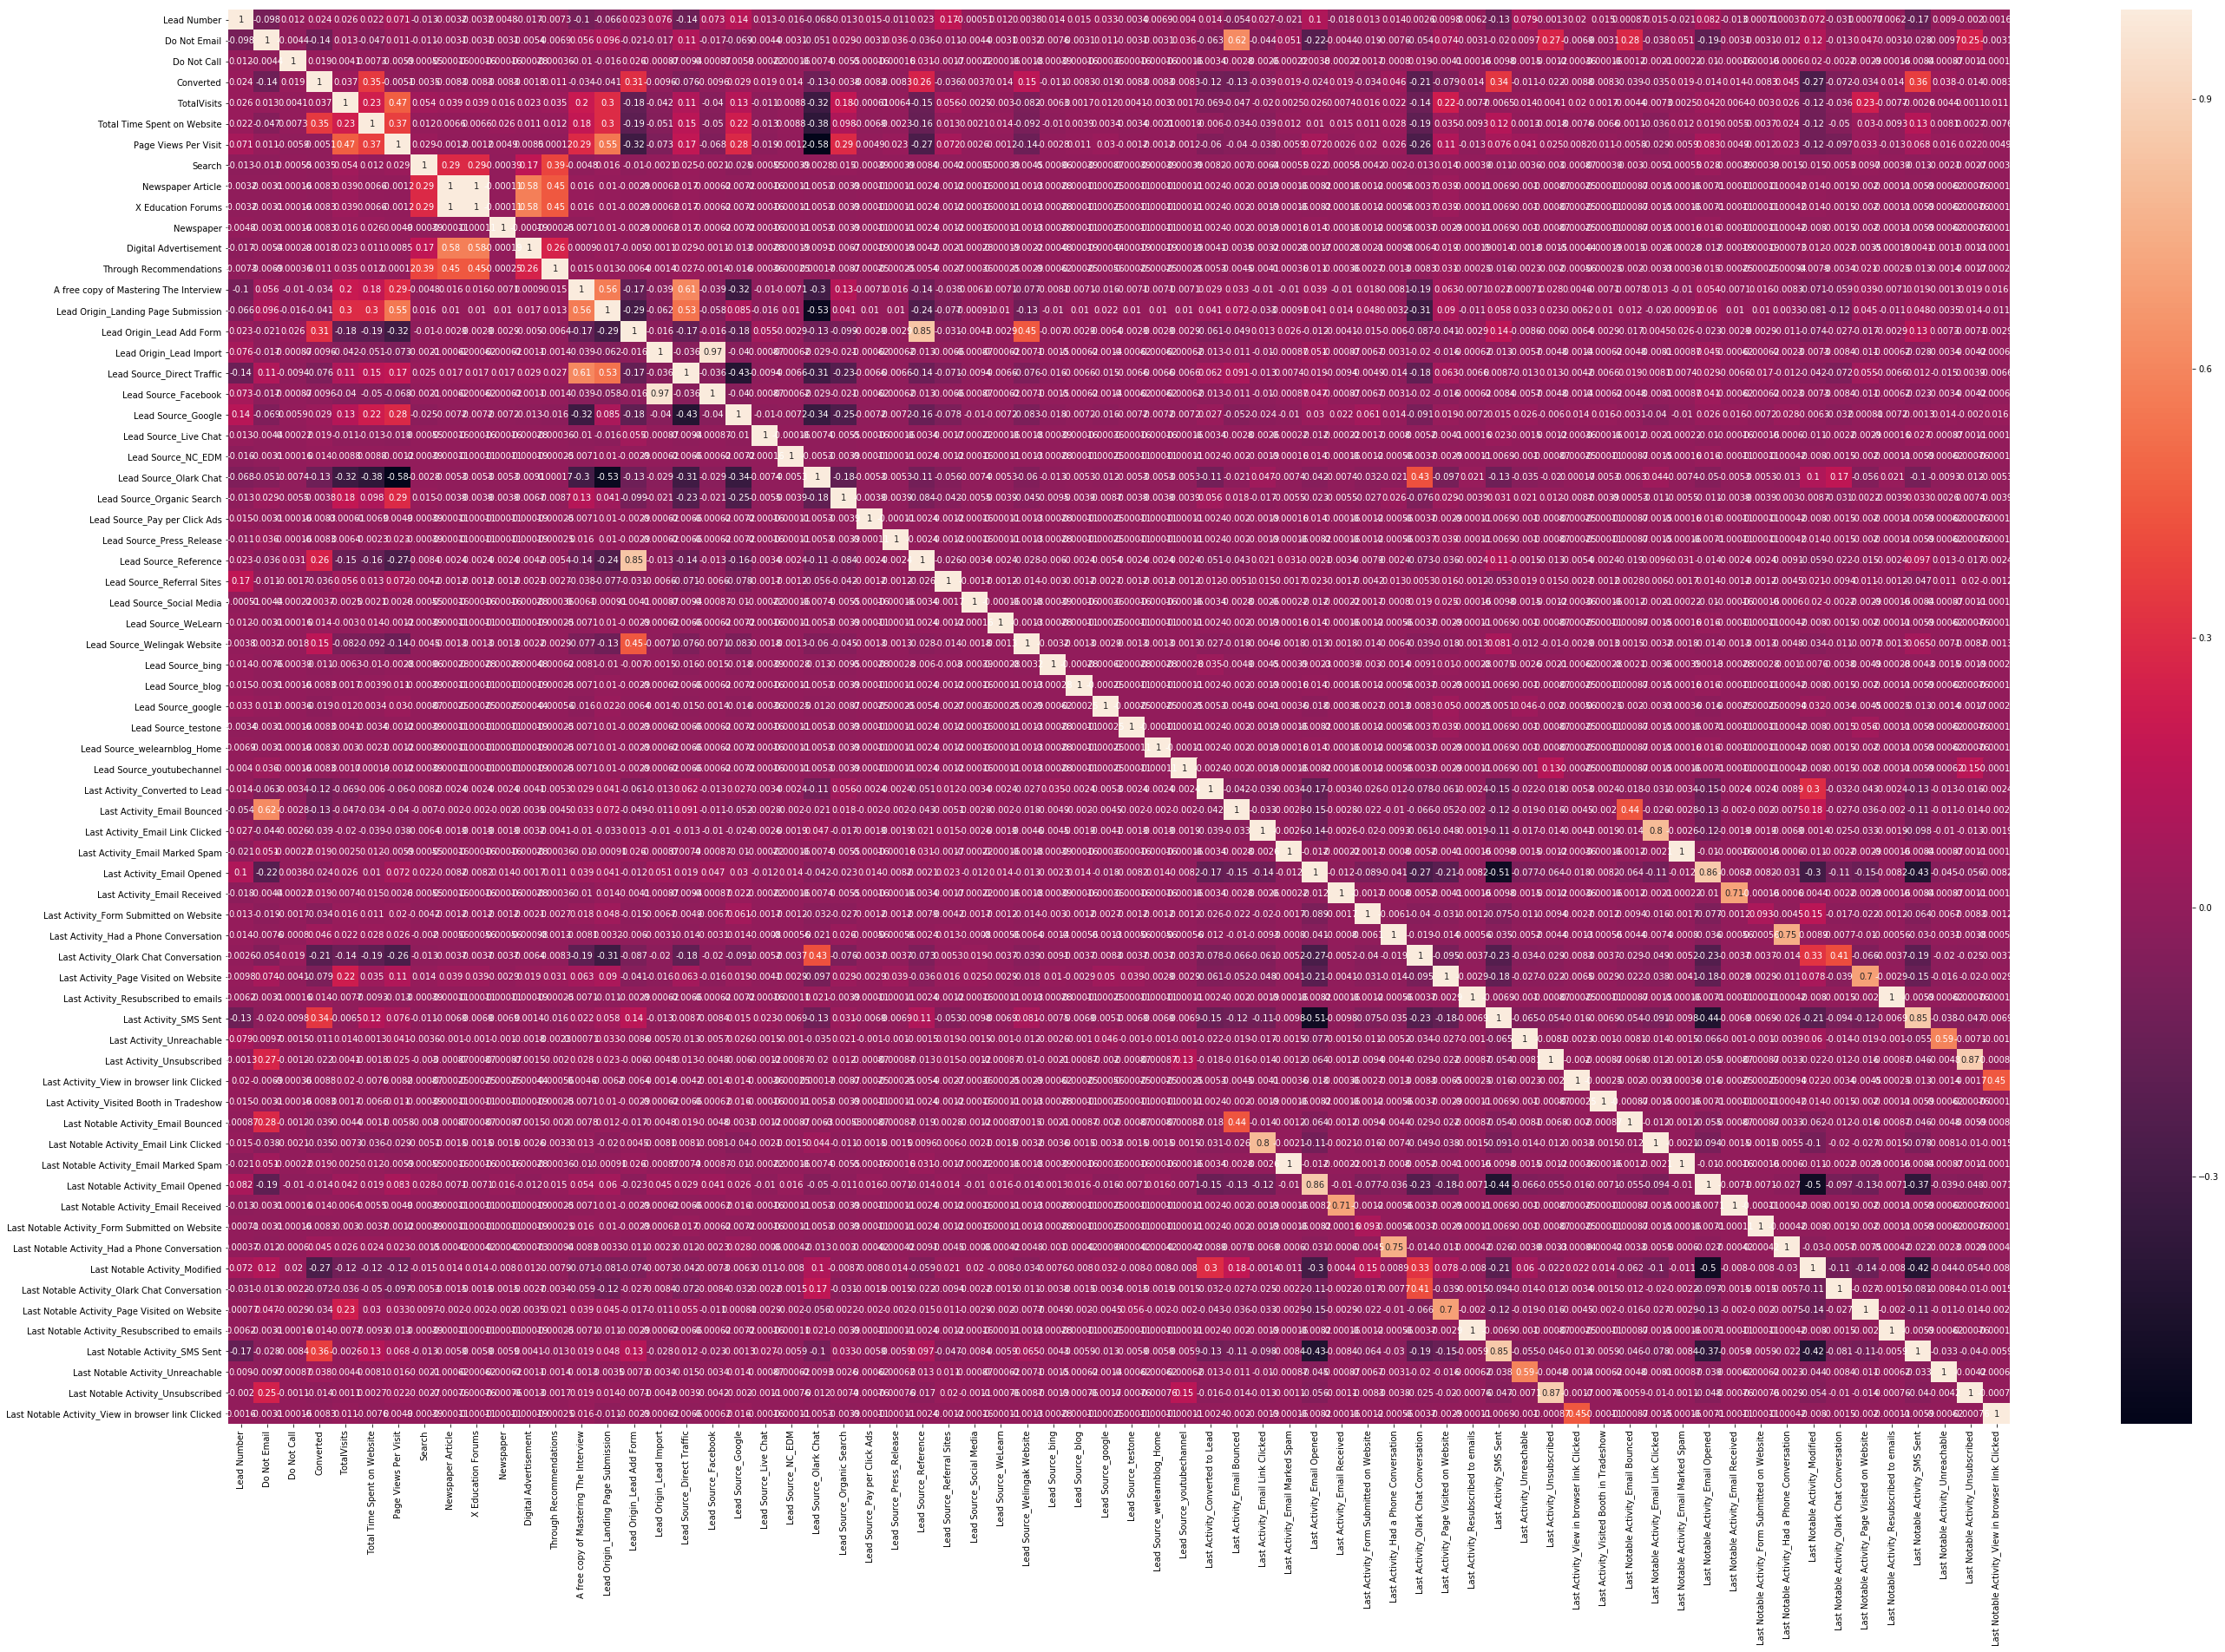

In [53]:
# Let's see the correlation matrix 
plt.figure(figsize = (46,30))        # Size of the figure
sns.heatmap(leads.corr(),annot = True)
plt.show()

### Model Building

In [54]:
import statsmodels.api as sm

In [55]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6224
Model:                            GLM   Df Residuals:                     6165
Model Family:                Binomial   Df Model:                           58
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 03 Mar 2019   Deviance:                          nan
Time:                        11:46:58   Pearson chi2:                 8.14e+18
No. Iterations:                   100   Covariance Type:             nonrobust
======================================================================================================================
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
const                                               4.761e+15   4.89e+07   9.74e+07      0.000    4.76e+15    4.76e+15
Lead Number                                         1.957e+14   9.07e+05   2.16e+08      0.000    1.96e+14    1.96e+14
Do Not Email                                       -9.357e+14    4.4e+06  -2.13e+08      0.000   -9.36e+14   -9.36e+14
Do Not Call                                         1.127e+15   4.76e+07   2.37e+07      0.000    1.13e+15    1.13e+15
TotalVisits                                         1.505e+14   9.93e+05   1.52e+08      0.000    1.51e+14    1.51e+14
Total Time Spent on Website                         1.227e+14   9.78e+05   1.25e+08      0.000    1.23e+14    1.23e+14
Page Views Per Visit                               -1.081e+14   1.37e+06   -7.9e+07      0.000   -1.08e+14   -1.08e+14
Search                                             -1.203e+15   2.61e+07  -4.61e+07      0.000    -1.2e+15    -1.2e+15
Newspaper Article                                  -2.038e+16   5.22e+07  -3.91e+08      0.000   -2.04e+16   -2.04e+16
X Education Forums                                 -2.038e+16   5.22e+07  -3.91e+08      0.000   -2.04e+16   -2.04e+16
Newspaper                                          -2.115e+16   6.72e+07  -3.15e+08      0.000   -2.12e+16   -2.12e+16
Digital Advertisement                               2.155e+16   6.73e+07    3.2e+08      0.000    2.15e+16    2.15e+16
Through Recommendations                             1.779e+16   3.98e+07   4.47e+08      0.000    1.78e+16    1.78e+16
A free copy of Mastering The Interview             -2.628e+13   2.67e+06  -9.85e+06      0.000   -2.63e+13   -2.63e+13
Lead Origin_Landing Page Submission                 5.785e+13   2.73e+06   2.12e+07      0.000    5.79e+13    5.79e+13
Lead Origin_Lead Add Form                           3.136e+15   4.35e+07   7.21e+07      0.000    3.14e+15    3.14e+15
Lead Origin_Lead Import                              2.64e+13   5.31e+07   4.97e+05      0.000    2.64e+13    2.64e+13
Lead Source_Direct Traffic                          1.557e+15   4.32e+07   3.61e+07      0.000    1.56e+15    1.56e+15
Lead Source_Facebook                                1.272e+15    5.3e+07    2.4e+07      0.000    1.27e+15    1.27e+15
Lead Source_Google                                  1.756e+15   4.31e+07   4.07e+07      0.000    1.76e+15    1.76e+15
Lead Source_Live Chat                               8.523e+14   4.96e+07   1.72e+07      0.000    8.52e+14    8.52e+14
Lead Source_NC_EDM                                  1.931e+16   7.98e+07   2.42e+08      0.000    1.93e+16    1.93e+16
Lead Source_Olark Chat                              2.856e+15   4.31e+07   6.63e+07      0.000    2.86e+15    2.86e+15
Lead Source_Organic Search                          1.766e+15   4.32

### Feature Selection Using RFE

In [56]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [57]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 25)             
rfe = rfe.fit(X_train, y_train)

In [58]:
rfe.support_

array([False,  True, False, False,  True, False,  True, False, False,
        True, False,  True, False, False,  True,  True, False, False,
       False, False, False,  True, False, False, False,  True,  True,
       False, False,  True, False, False, False, False, False, False,
        True,  True, False, False, False, False,  True,  True,  True,
        True, False, False,  True, False, False, False, False,  True,
       False,  True, False, False,  True,  True,  True, False, False,
        True,  True, False, False])

In [59]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Number', False, 27),
 ('Do Not Email', True, 1),
 ('Do Not Call', False, 2),
 ('TotalVisits', False, 22),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 26),
 ('Search', True, 1),
 ('Newspaper Article', False, 24),
 ('X Education Forums', False, 21),
 ('Newspaper', True, 1),
 ('Digital Advertisement', False, 29),
 ('Through Recommendations', True, 1),
 ('A free copy of Mastering The Interview', False, 39),
 ('Lead Origin_Landing Page Submission', False, 38),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Direct Traffic', False, 5),
 ('Lead Source_Facebook', False, 36),
 ('Lead Source_Google', False, 6),
 ('Lead Source_Live Chat', False, 34),
 ('Lead Source_NC_EDM', False, 17),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 7),
 ('Lead Source_Pay per Click Ads', False, 40),
 ('Lead Source_Press_Release', False, 37),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referr

In [60]:
col = X_train.columns[rfe.support_]#"Lead Source_Reference",#"Through Recommendations",


In [61]:
X_train.columns[~rfe.support_]

Index(['Lead Number', 'Do Not Call', 'TotalVisits', 'Page Views Per Visit',
       'Newspaper Article', 'X Education Forums', 'Digital Advertisement',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed',
       'Last Activity_View in browser link

In [62]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6224
Model:                            GLM   Df Residuals:                     6198
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2727.4
Date:                Sun, 03 Mar 2019   Deviance:                       5454.8
Time:                        11:46:59   Pearson chi2:                 6.38e+03
No. Iterations:                    19   Covariance Type:             nonrobust
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.2465      0.248     -0.993      0.321      -0.733       0.240
Do Not Email                                      -1.2954      0.192     -6.736      0.000      -1.672      -0.918
Total Time Spent on Website                        1.1336      0.040     28.397      0.000       1.055       1.212
Search                                            -1.7707      1.225     -1.446      0.148      -4.171       0.630
Newspaper                                        -22.2368   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Through Recommendations                            2.8821      1.514      1.904      0.057      -0.085       5.849
Lead Origin_Lead Add Form                          4.1409      0.757      5.468      0.000       2.657       5.625
Lead Origin_Lead Import                            1.3768      0.513      2.683      0.007       0.371       2.382
Lead Source_Olark Chat                             1.1687      0.101     11.623      0.000       0.972       1.366
Lead Source_Reference                              0.1181      0.785      0.150      0.880      -1.421       1.657
Lead Source_Referral Sites                        -0.6800      0.354     -1.919      0.055      -1.374       0.014
Lead Source_Welingak Website                       2.2248      1.260      1.765      0.078      -0.246       4.695
Last Activity_Converted to Lead                   -0.8336      0.205     -4.072      0.000      -1.235      -0.432
Last Activity_Email Bounced                       -1.3817      0.410     -3.371      0.001      -2.185      -0.578
Last Activity_Form Submitted on Website           -0.7277      0.332     -2.191      0.028      -1.379      -0.077
Last Activity_Had a Phone Conversation             1.1259      0.823      1.369      0.171      -0.486       2.738
Last Activity_Olark Chat Conversation             -1.3661      0.186     -7.347      0.000      -1.730      -1.002
Last Activity_Page Visited on Website             -1.1329      0.214     -5.290      0.000      -1.553      -0.713
Last Activity_Unreachable                         -1.0235      0.608     -1.685      0.092      -2.214       0.167
Last Notable Activity_Email Link Clicked          -1.4722      0.359     -4.097      0.000      -2.176      -0.768
Last Notable Activity_Email Opened                -0.8666      0.253     -3.422      0.001      -1.363      -0.370
Last Notable Activity_Had a Phone Conversation     1.2567      1.387      0.906      0.365      -1.462       3.976
Last Notable Activity_Modified                    -1.0407      0.238     -4.364      0.000      -1.508      -0.573
Last Notable Activity_Olark Chat Conversation     -1.0993      0.423     -2.600      0.009      -1.928      -0.270
Last Notable Activity_SMS Sent                     0.5760

In [63]:
# droping columns ,droping multiple to shorten the python notebook after  droping them individualliny
col = col.drop(["Newspaper","Search","Lead Source_Reference","Last Notable Activity_Had a Phone Conversation","Last Activity_Unreachable","Last Notable Activity_Unreachable","Through Recommendations","Last Notable Activity_SMS Sent"], 1)

In [64]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6224
Model:                            GLM   Df Residuals:                     6206
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2736.8
Date:                Sun, 03 Mar 2019   Deviance:                       5473.6
Time:                        11:46:59   Pearson chi2:                 6.39e+03
No. Iterations:                     7   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.2988      0.066      4.509      0.000       0.169       0.429
Do Not Email                                     -1.3830      0.189     -7.323      0.000      -1.753      -1.013
Total Time Spent on Website                       1.1323      0.040     28.412      0.000       1.054       1.210
Lead Origin_Lead Add Form                         4.2448      0.221     19.242      0.000       3.812       4.677
Lead Origin_Lead Import                           1.3737      0.513      2.680      0.007       0.369       2.378
Lead Source_Olark Chat                            1.1691      0.100     11.664      0.000       0.973       1.366
Lead Source_Referral Sites                       -0.7212      0.354     -2.035      0.042      -1.416      -0.027
Lead Source_Welingak Website                      2.1377      1.033      2.069      0.039       0.113       4.163
Last Activity_Converted to Lead                  -0.8531      0.203     -4.208      0.000      -1.250      -0.456
Last Activity_Email Bounced                      -1.5429      0.406     -3.796      0.000      -2.340      -0.746
Last Activity_Form Submitted on Website          -0.7563      0.331     -2.288      0.022      -1.404      -0.108
Last Activity_Had a Phone Conversation            1.3970      0.630      2.218      0.027       0.162       2.631
Last Activity_Olark Chat Conversation            -1.3865      0.184     -7.530      0.000      -1.747      -1.026
Last Activity_Page Visited on Website            -1.4532      0.156     -9.317      0.000      -1.759      -1.148
Last Notable Activity_Email Link Clicked         -2.0160      0.269     -7.494      0.000      -2.543      -1.489
Last Notable Activity_Email Opened               -1.4148      0.085    -16.680      0.000      -1.581      -1.249
Last Notable Activity_Modified                   -1.5651      0.099    -15.736      0.000      -1.760      -1.370
Last Notable Activity_Olark Chat Conversation    -1.6217      0.363     -4.466      0.000      -2.333      -0.910
=================================================================================================================
"""

### all features have p<.05

In [65]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]


8735    0.109460
4460    0.280289
629     0.193009
1529    0.662509
3382    0.077289
1241    0.250998
6075    0.053417
6014    0.436988
4409    0.894037
1936    0.333126
dtype: float64

In [66]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.10945981, 0.28028896, 0.19300905, 0.66250852, 0.0772892 ,
       0.25099773, 0.0534171 , 0.43698794, 0.89403711, 0.33312551])

In [67]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['ID'] = y_train.index
y_train_pred_final.head(10)

,Converted,Converted_Prob,ID
0,0,0.109460,8735
1,0,0.280289,4460
2,0,0.193009,629
3,1,0.662509,1529
4,0,0.077289,3382
5,0,0.250998,1241
6,0,0.053417,6075
7,0,0.436988,6014
8,0,0.894037,4409
9,0,0.333126,1936


In [68]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.8 else 0)

# Let's see the head
y_train_pred_final.head(10)

,Converted,Converted_Prob,ID,predicted
0,0,0.109460,8735,0
1,0,0.280289,4460,0
2,0,0.193009,629,0
3,1,0.662509,1529,0
4,0,0.077289,3382,0
5,0,0.250998,1241,0
6,0,0.053417,6075,0
7,0,0.436988,6014,0
8,0,0.894037,4409,1
9,0,0.333126,1936,0


In [69]:
from sklearn import metrics

In [70]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3765  120]
 [1506  833]]


In [71]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7387532133676092


In [72]:
def model_accuracy():
    y_train_pred = res.predict(X_train_sm).values.reshape(-1)
    y_train_pred[:10]
    y_train_pred_final['Converted_Prob'] = y_train_pred
    # Creating new column 'predicted' with 1 if Converted_Prob > 0.8 else 0
    y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.8 else 0)
    y_train_pred_final.head()
    # Let's check the overall accuracy.
    print('Model accuracy after dropping a column ' ,  metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

## Checking VIFs

In [73]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [74]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,Last Notable Activity_Modified,2.23
11,Last Activity_Olark Chat Conversation,2.10
8,Last Activity_Email Bounced,1.76
0,Do Not Email,1.74
4,Lead Source_Olark Chat,1.66
2,Lead Origin_Lead Add Form,1.38
16,Last Notable Activity_Olark Chat Conversation,1.36
7,Last Activity_Converted to Lead,1.29
6,Lead Source_Welingak Website,1.28
1,Total Time Spent on Website,1.22


In [75]:
model_accuracy()

Model accuracy after dropping a column  0.7387532133676092


In [76]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6224
Model:                            GLM   Df Residuals:                     6206
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2736.8
Date:                Sun, 03 Mar 2019   Deviance:                       5473.6
Time:                        11:47:00   Pearson chi2:                 6.39e+03
No. Iterations:                     7   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.2988      0.066      4.509      0.000       0.169       0.429
Do Not Email                                     -1.3830      0.189     -7.323      0.000      -1.753      -1.013
Total Time Spent on Website                       1.1323      0.040     28.412      0.000       1.054       1.210
Lead Origin_Lead Add Form                         4.2448      0.221     19.242      0.000       3.812       4.677
Lead Origin_Lead Import                           1.3737      0.513      2.680      0.007       0.369       2.378
Lead Source_Olark Chat                            1.1691      0.100     11.664      0.000       0.973       1.366
Lead Source_Referral Sites                       -0.7212      0.354     -2.035      0.042      -1.416      -0.027
Lead Source_Welingak Website                      2.1377      1.033      2.069      0.039       0.113       4.163
Last Activity_Converted to Lead                  -0.8531      0.203     -4.208      0.000      -1.250      -0.456
Last Activity_Email Bounced                      -1.5429      0.406     -3.796      0.000      -2.340      -0.746
Last Activity_Form Submitted on Website          -0.7563      0.331     -2.288      0.022      -1.404      -0.108
Last Activity_Had a Phone Conversation            1.3970      0.630      2.218      0.027       0.162       2.631
Last Activity_Olark Chat Conversation            -1.3865      0.184     -7.530      0.000      -1.747      -1.026
Last Activity_Page Visited on Website            -1.4532      0.156     -9.317      0.000      -1.759      -1.148
Last Notable Activity_Email Link Clicked         -2.0160      0.269     -7.494      0.000      -2.543      -1.489
Last Notable Activity_Email Opened               -1.4148      0.085    -16.680      0.000      -1.581      -1.249
Last Notable Activity_Modified                   -1.5651      0.099    -15.736      0.000      -1.760      -1.370
Last Notable Activity_Olark Chat Conversation    -1.6217      0.363     -4.466      0.000      -2.333      -0.910
=================================================================================================================
"""

In [77]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [78]:
y_train_pred[:10]

array([0.10945981, 0.28028896, 0.19300905, 0.66250852, 0.0772892 ,
       0.25099773, 0.0534171 , 0.43698794, 0.89403711, 0.33312551])

In [79]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [80]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.8 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.8 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,ID,predicted
0,0,0.109460,8735,0
1,0,0.280289,4460,0
2,0,0.193009,629,0
3,1,0.662509,1529,0
4,0,0.077289,3382,0


In [81]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7387532133676092


In [82]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,Last Notable Activity_Modified,2.23
11,Last Activity_Olark Chat Conversation,2.10
8,Last Activity_Email Bounced,1.76
0,Do Not Email,1.74
4,Lead Source_Olark Chat,1.66
2,Lead Origin_Lead Add Form,1.38
16,Last Notable Activity_Olark Chat Conversation,1.36
7,Last Activity_Converted to Lead,1.29
6,Lead Source_Welingak Website,1.28
1,Total Time Spent on Website,1.22


In [83]:
# col = col.drop('Last Activity_Email Opened', 1)

# # Let's re-run the model using the selected variables
# X_train_sm = sm.add_constant(X_train[col])
# logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
# res = logm3.fit()
# res.summary()

y_train_pred = res.predict(X_train_sm).values.reshape(-1)

y_train_pred_final['Converted_Prob'] = y_train_pred

# Creating new column 'predicted' with 1 if Converted_Prob > 0.8 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.8 else 0)
y_train_pred_final.head()

# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7387532133676092


In [84]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,Last Notable Activity_Modified,2.23
11,Last Activity_Olark Chat Conversation,2.10
8,Last Activity_Email Bounced,1.76
0,Do Not Email,1.74
4,Lead Source_Olark Chat,1.66
2,Lead Origin_Lead Add Form,1.38
16,Last Notable Activity_Olark Chat Conversation,1.36
7,Last Activity_Converted to Lead,1.29
6,Lead Source_Welingak Website,1.28
1,Total Time Spent on Website,1.22


# Metrics Beyond Simple Accuracy

In [85]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3765,  120],
       [1506,  833]])

In [86]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7387532133676092

In [87]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [88]:
#Sensitivity
TP / float(TP+FN)

0.35613510047028646

In [89]:
#specificity
TN / float(TN+FP)

0.9691119691119691

In [90]:
# Calculate false postive rate - predicting converted Leads
print(FP/ float(TN+FP))

0.03088803088803089


In [91]:
# positive predictive value 
print (TP / float(TP+FP))

0.8740818467995802


In [92]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7142857142857143


# ROC Curve

In [93]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [94]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

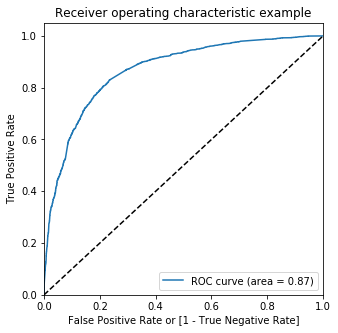

In [95]:
draw_roc(y_train_pred_final.Converted,y_train_pred_final.Converted_Prob)

# Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [96]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.109460,8735,0,1,1,0,0,0,0,0,0,0,0
1,0,0.280289,4460,0,1,1,1,0,0,0,0,0,0,0
2,0,0.193009,629,0,1,1,0,0,0,0,0,0,0,0
3,1,0.662509,1529,0,1,1,1,1,1,1,1,0,0,0
4,0,0.077289,3382,0,1,0,0,0,0,0,0,0,0,0


In [97]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.375803  1.000000  0.000000
0.1   0.1  0.570533  0.973920  0.327671
0.2   0.2  0.726221  0.908935  0.616216
0.3   0.3  0.790810  0.816588  0.775290
0.4   0.4  0.801093  0.753741  0.829601
0.5   0.5  0.798683  0.666524  0.878250
0.6   0.6  0.792738  0.592988  0.912999
0.7   0.7  0.761889  0.451903  0.948520
0.8   0.8  0.738753  0.356135  0.969112
0.9   0.9  0.683644  0.173578  0.990734


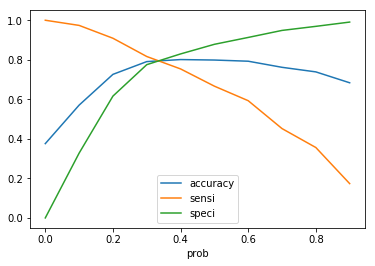

In [98]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above,approximately 0.3 is the optimum point to take it as a cutoff probability.

In [99]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.109460,8735,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.280289,4460,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.193009,629,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.662509,1529,0,1,1,1,1,1,1,1,0,0,0,1
4,0,0.077289,3382,0,1,0,0,0,0,0,0,0,0,0,0


In [100]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7908097686375322

In [101]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3012,  873],
       [ 429, 1910]])

In [102]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [103]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8165882855921334

In [104]:
# Let us calculate specificity
TN / float(TN+FP)

0.7752895752895753

In [105]:
# Calculate false postive rate - predicting conversion when customer Lead is not Converted
print(FP/ float(TN+FP))

0.2247104247104247


In [106]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6863097376931369


In [107]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8753269398430689


# Precision and Recall

In [108]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3765,  120],
       [1506,  833]])

In [109]:
#Precision
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8740818467995802

In [110]:
#Recall
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.35613510047028646

In [111]:
from sklearn.metrics import precision_recall_curve

In [112]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       0
 5       0
 6       0
 7       0
 8       0
 9       0
 10      1
 11      0
 12      0
 13      1
 14      1
 15      0
 16      0
 17      0
 18      1
 19      1
 20      0
 21      1
 22      1
 23      1
 24      0
 25      0
 26      1
 27      1
 28      1
 29      0
        ..
 6194    1
 6195    1
 6196    0
 6197    1
 6198    0
 6199    0
 6200    0
 6201    1
 6202    0
 6203    0
 6204    0
 6205    1
 6206    1
 6207    0
 6208    0
 6209    1
 6210    0
 6211    1
 6212    1
 6213    0
 6214    0
 6215    0
 6216    0
 6217    1
 6218    0
 6219    1
 6220    0
 6221    0
 6222    1
 6223    0
 Name: Converted, Length: 6224, dtype: int64, 0       0
 1       0
 2       0
 3       0
 4       0
 5       0
 6       0
 7       0
 8       1
 9       0
 10      1
 11      0
 12      1
 13      0
 14      1
 15      0
 16      0
 17      0
 18      1
 19      0
 20      0
 21      0
 22      0
 23      0
 24      0
 25      

In [113]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

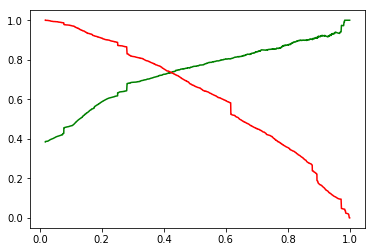

In [114]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [115]:
X_test.head()

,Lead Number,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2153,639133,0,0,3.0,1376,3.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
404,656213,0,0,5.0,1354,2.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2214,638321,0,0,0.0,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
578,654283,0,0,3.0,726,3.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5279,609296,1,0,2.0,195,2.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


Precision and Recall Trade-off found at 0.4

# Making Predictions on Test Set

In [116]:
X_test[['Lead Number','TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=scaler.transform(X_test[['Lead Number','TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
#["Lead Source_Reference","Through Recommendations","Lead Source_Social Media",'Do Not Call',"Newspaper","Digital Advertisement","Last Notable Activity_Had a Phone Conversation","Last Activity_Email Received","Lead Source_google","Last Notable Activity_Resubscribed to emails"]

In [117]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Olark Chat,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
2153,0,1.653130,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
404,0,1.612633,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2214,0,-0.879778,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
578,0,0.456625,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5279,1,-0.520827,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [118]:
#finding Constant
X_test_sm = sm.add_constant(X_test)

# Predictions on Test Dataset

In [119]:
y_test_pred = res.predict(X_test_sm)

In [120]:
y_test_pred[:10]

2153    0.897574
404     0.636373
2214    0.280289
578     0.320987
5279    0.008311
2184    0.333792
6127    0.894037
8305    0.280289
8216    0.111292
97      0.077289
dtype: float64

In [121]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

y_pred_1.head()

,0
2153,0.897574
404,0.636373
2214,0.280289
578,0.320987
5279,0.008311


In [122]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [123]:
# Putting Lead Number to index
y_test_df['Lead Number'] = y_test_df.index

In [124]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [125]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [126]:
y_pred_final.head()

,Converted,Lead Number,0
0,1,2153,0.897574
1,1,404,0.636373
2,1,2214,0.280289
3,0,578,0.320987
4,0,5279,0.008311


In [127]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [128]:
y_pred_final.head()

,Converted,Lead Number,Converted_Prob
0,1,2153,0.897574
1,1,404,0.636373
2,1,2214,0.280289
3,0,578,0.320987
4,0,5279,0.008311


In [129]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['Lead Number','Converted','Converted_Prob'], axis=1)

In [130]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Lead Number,Converted,Converted_Prob
0,2153,1,0.897574
1,404,1,0.636373
2,2214,1,0.280289
3,578,0,0.320987
4,5279,0,0.008311


In [131]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [132]:
y_pred_final.head()

,Lead Number,Converted,Converted_Prob,final_predicted
0,2153,1,0.897574,1
1,404,1,0.636373,1
2,2214,1,0.280289,0
3,578,0,0.320987,1
4,5279,0,0.008311,0


In [133]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7923538230884558

In [134]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1271,  357],
       [ 197,  843]])

In [135]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [136]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8105769230769231

In [137]:
# Let us calculate specificity
TN / float(TN+FP)

0.7807125307125307

In [138]:
#Precision
confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.7025

In [139]:
#Recall
confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

0.8105769230769231

In [140]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7025


In [141]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8658038147138964


### Createing the Lead Score

In [142]:
y_pred_final["Lead Score"]=y_pred_final["Converted_Prob"]*100
y_pred_final.head()

,Lead Number,Converted,Converted_Prob,final_predicted,Lead Score
0,2153,1,0.897574,1,89.757443
1,404,1,0.636373,1,63.637285
2,2214,1,0.280289,0,28.028896
3,578,0,0.320987,1,32.098725
4,5279,0,0.008311,0,0.831129


### Lead Score a score between 0 and 100 to each of the leads which can be used by the company to target potential leads